![](https://github.com/sfbrigade/CA_DOJ_OpenJustice/blob/master/figure/ca_openjustice.png?raw=true)

## Prompt

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import wget

import numpy as np

import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,classification_report
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from sklearn.learning_curve import learning_curve
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV

%matplotlib inline

In [10]:
crime_df = pd.read_csv("all_features_so_far.csv")

In [11]:
crime_df.info()
# crime_df.types
# crime_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
Year                  37 non-null int64
Violent Crime rate    37 non-null float64
Avg unemployment      37 non-null float64
dtypes: float64(2), int64(1)
memory usage: 968.0 bytes


## Exploratory Data Analysis

In [14]:
crime_df.head(10)

crime_df.columns = ['Year','Violent_Crime_Rate','Avg_Unemployment']

In [40]:
crime_df

,Year,Violent_Crime_Rate,Avg_Unemployment
0,1976,669.3,9.108333
1,1977,706.0,8.316667
2,1978,742.9,7.158333
3,1979,811.1,6.241667
4,1980,893.6,6.875000
5,1981,863.0,7.416667
6,1982,814.7,9.975000
7,1983,772.6,9.783333
8,1984,763.4,7.750000
9,1985,765.3,7.150000


## Pair Plot Code

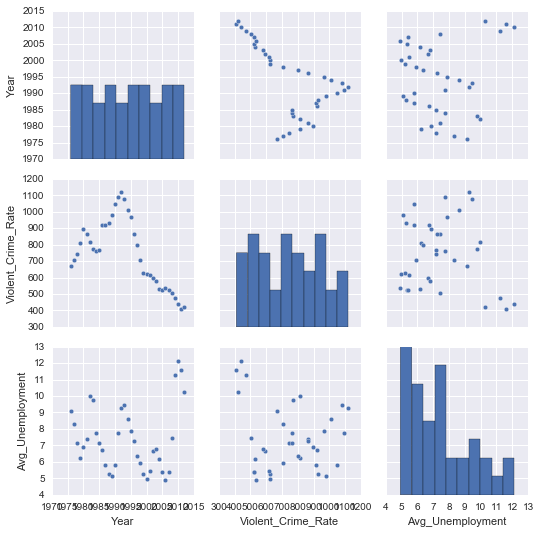

In [15]:
# Maybe not the best idea...
sns.pairplot(crime_df)
plt.show()
# plt.savefig('/Users/Hayw1re/ds/metis/classwork/sf16_ds3/projects/02-luther/submissions/floofydugong/{}'.format("PairPlot.png"))

## Linear Regression Code

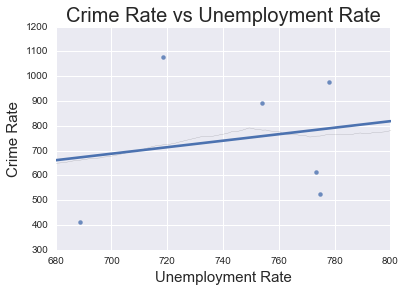

Intercept_ :  [ 848.47048331]
Coef_ :  [[-13.76936845]]


('Avg_Unemployment', array([-13.76936845]))


In [76]:
target = crime_df['Violent_Crime_Rate']
feature = crime_df['Avg_Unemployment']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.15,random_state=42)

linear_model = LinearRegression()

lm = LinearRegression()
lm.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

y_pred = lm.predict(X_test.reshape(-1,1))

sns.regplot(y_pred,y_test,ci=0)
plt.title("Crime Rate vs Unemployment Rate", fontsize="20")
plt.xlabel("Unemployment Rate",fontsize="15")
plt.ylabel("Crime Rate",fontsize="15")
plt.show()

zip_features = zip(['Avg_Unemployment'], lm.coef_)

print ("Intercept_ : ", lm.intercept_)
print ("Coef_ : ", lm.coef_)
# print ("lm.rsquared : ", lm.score(X_test,y_pred))
print("\n")
 
for feature in zip_features:
    print(feature)
